In [1]:

import tensorflow as tf
# from tensorflow.keras import layers
from numpy import genfromtxt

import io
import csv
import pandas as pd
import numpy as np
np.set_printoptions(threshold=50)
# import sklearn

# from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import OneHotEncoder
# from sklearn import metrics,preprocessing

from tensorflow import keras
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input
# from tensorflow.keras.layers import LSTM
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import Masking
# from tensorflow.keras.utils import plot_model
from numpy import array
from numpy import argmax

In [2]:
import folium
import tensorflow as tf
import numpy as np
# 創建地圖中心點座標
center = [25.033964, 121.564468]

# 創建地圖對象
m = folium.Map(location=center, zoom_start=13)

# 加入標記
folium.Marker(location=center, tooltip='Taipei 101').add_to(m)

# 顯示地圖
m

In [3]:
import pandas as pd
latlon=pd.read_csv('poi-TKY.csv')
k=1
data=[]
x=[]
y=[]
while k!=3681:
    temp=[]
    temp.append(latlon.poiLon[k])
    x.append(latlon.poiLon[k])
    y.append(latlon.poiLat[k])
    temp.append(latlon.poiLat[k])
    data.append(temp)
    k+=1
data

[[139.8051453, 35.74964694],
 [139.767254, 35.669687],
 [139.7673154, 35.66808763],
 [139.7667561, 35.66833822],
 [139.7730182, 35.6985962],
 [139.770555, 35.700941],
 [139.7712931, 35.70128072],
 [139.7746217, 35.69901542],
 [139.7706521, 35.70093221],
 [139.7739056, 35.69926155],
 [139.7760584, 35.71341173],
 [139.8269248, 35.64592362],
 [139.7915176, 35.63379647],
 [139.7916135, 35.63440986],
 [139.7942662, 35.62986668],
 [139.7708103, 35.69997164],
 [139.7866304, 35.697973],
 [139.7859755, 35.69746615],
 [139.7708713, 35.70084933],
 [139.772374, 35.69965384],
 [139.7660816, 35.68137872],
 [139.7659636, 35.68148766],
 [139.7636139, 35.68691239],
 [139.7498274, 35.69320376],
 [139.7717518, 35.70042688],
 [139.7716284, 35.6983271],
 [139.7719771, 35.70018728],
 [139.7709632, 35.72777124],
 [139.7718, 35.70104548],
 [139.771692, 35.700226],
 [139.8356581, 35.68985772],
 [139.7682153, 35.67993969],
 [139.7683553, 35.68018027],
 [139.7695309, 35.67999307],
 [139.7002792, 35.69080269],
 [

In [4]:
Maxx=max(x)+0.0000001
minx=min(x)-0.0000001
print("MAX:",Maxx)
print("min:",minx)
Maxy=max(y)+0.0000001
miny=min(y)-0.0000001
print("MAX:",Maxy)
print("min:",miny)

MAX: 139.90835909999998
min: 139.4715809
MAX: 35.86406843
min: 35.51294112


In [5]:
data = np.array(data)

In [6]:
def generalID(lon,lat,column_num,row_num):
    # 若在范围外的点，返回-1
    if lon < minx or lon > Maxx or lat < miny or lat > Maxy:
        print("範圍外")
        return -1
    # 把经度范围根据列数等分切割
    column = (Maxx - minx)/column_num
    # 把纬度范围根据行数数等分切割
    row = (Maxy - miny)/row_num
    # 二维矩阵坐标索引转换为一维ID，即： （列坐标区域（向下取整）+ 1） + （行坐标区域 * 列数）
    return int((lon-minx)/column),int((lat-miny)/row),int((lon-minx)/column) + int((lat-miny)/row) * column_num


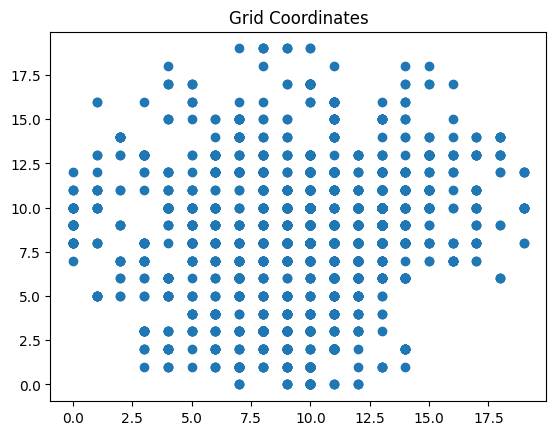

[0, 275, 173, 173, 173, 213, 213, 213, 213, 213, 213, 233, 156, 134, 134, 134, 213, 214, 214, 213, 213, 193, 193, 193, 212, 213, 213, 213, 253, 213, 213, 216, 193, 193, 193, 210, 234, 234, 234, 234, 213, 213, 213, 213, 213, 212, 213, 212, 212, 213, 213, 214, 213, 390, 390, 368, 69, 170, 170, 170, 170, 170, 170, 170, 170, 170, 170, 131, 170, 170, 170, 173, 170, 212, 170, 170, 170, 68, 89, 170, 89, 69, 193, 69, 69, 170, 51, 147, 170, 209, 170, 89, 170, 152, 10, 170, 170, 192, 89, 193, 150, 89, 165, 165, 143, 165, 165, 189, 209, 210, 184, 165, 187, 187, 188, 210, 210, 233, 233, 233, 186, 210, 165, 205, 205, 204, 205, 185, 186, 166, 165, 210, 210, 210, 210, 189, 189, 188, 188, 188, 168, 167, 167, 186, 166, 167, 166, 187, 165, 224, 185, 165, 188, 210, 165, 165, 165, 186, 185, 165, 145, 185, 165, 124, 124, 124, 168, 169, 190, 170, 170, 170, 205, 225, 225, 226, 206, 206, 186, 165, 146, 147, 165, 165, 166, 146, 146, 165, 188, 210, 165, 166, 188, 185, 210, 185, 185, 165, 210, 165, 166, 165, 205

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 定義座標範圍和網格大小
coordinate_range = 100
grid_size = 20


# 計算網格座標
grid_x = []
grid_y = []
L=[]
L.append(0)
for i in range(len(data)):
    a,b,label=generalID(data[i][0], data[i][1],grid_size,grid_size)
#     print(a,b,label)
    grid_x.append(a)
    grid_y.append(b)
    L.append(label)

# 繪製散佈圖
# plt.scatter(data[:, 0], data[:, 1])
# plt.title("Original Coordinates")
# plt.show()

plt.scatter(grid_x[:], grid_y[:])
plt.title("Grid Coordinates")
plt.show()
print(L)

In [8]:
a,b,label=generalID(min(x), min(y),grid_size,grid_size)
print(a,b,label)

0 0 0


In [26]:
print(L[26],L[275],L[45],L[28],L[10])

213 193 212 253 213


In [23]:
L=np.array(L)
L.reshape(3681,1)

array([[  0],
       [275],
       [173],
       ...,
       [171],
       [131],
       [ 63]])

In [25]:
path = 'coorlabeltest3681poi.csv'
with open(path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(L)

In [50]:
df=pd.read_excel('clus0tripbalance.xlsx')
df=df.fillna(0)
df2=[]
for i in range(len(df)):
    df3=[]
    j=0
    while j!=38:
        df3.append(df.iat[i,j])
        j+=1
    df2.append(df3)
df2

[[117,
  732,
  511,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [1551,
  231,
  3294,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [241,
  1353,
  2566,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0],
 [136,
  620,
  1235,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0

In [51]:
df2 = np.array(df2)
df2.shape

(18000, 38)

In [52]:
idf2 = df2.astype(int)
idf2

array([[ 117,  732,  511, ...,    0,    0,    0],
       [1551,  231, 3294, ...,    0,    0,    0],
       [ 241, 1353, 2566, ...,    0,    0,    0],
       ...,
       [ 351, 2637, 1143, ..., 3392, 1158, 2544],
       [2206, 1112, 3014, ..., 1754,  780, 2242],
       [3649, 3497,  902, ..., 3506, 2648,  425]])

In [53]:
D=[]
for i in range(len(idf2)):
    for j in range(len(idf2[i])):
        D.append(idf2[i][j])
        D.append(L[idf2[i][j]])
D

[117,
 233,
 732,
 193,
 511,
 213,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1551,
 251,
 231,
 191,
 3294,
 109,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 241,
 212,
 1353,
 173,
 2566,
 263,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 136,
 189,
 620,
 250,
 1235,
 210,
 0,
 0,
 0,

In [54]:
len(D)

1368000

In [55]:
D=np.array(D)
D = D.reshape(int(len(D)/2),2)

In [56]:
path = 'clus0coorlabel.csv'
with open(path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(D)